# ¡Llena ese carrito!

# Introducción
Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.
Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución. También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos
Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.
- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
 - `'order_id'`: número de ID que identifica de manera única cada pedido.
 - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
 - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
 - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
 - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
 - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
 - `'product_id'`: número ID que identifica de manera única cada producto.
 - `'product_name'`: nombre del producto.
 - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
 - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
 - `'order_id'`: número de ID que identifica de manera única cada pedido.
 - `'product_id'`: número ID que identifica de manera única cada producto.
 - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
 - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
 - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
 - `'aisle'`: nombre del pasillo.
- `departments.csv`
 - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
 - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos
Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución
plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

Para este primer paso consideré que lo mejor sería importar de una vez todas las librerías que podría utilizar, aunque la verdad es que las coloco porque me parece que son las que he visto a lo largo del sprint, sin embargo no estoy seguro de que vaya a usarlas todas de momento. 

In [2]:
# leer conjuntos de datos en los DataFrames
ins_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
orders = pd.read_csv('/datasets/order_products.csv', sep=';')

En este apartado creí que sería una buena práctica asignarle un nombre a cada tabla de datos, no estaba seguro de si se podían asignar estilo pd1, pd2, etc, por lo que puse un nombre descriptivo a cada tabla y posteriormente me fuera más sencillo manipular cada conjunto de datos. 

In [3]:
# mostrar información del DataFrame
print(ins_orders.info())
print(ins_orders.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [4]:
# mostrar información del DataFrame
print(products.info())
print(products.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [5]:
# mostrar información del DataFrame
print(aisles.info())
print(aisles.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
aisle_id    0
aisle       0
dtype: int64


In [6]:
# mostrar información del DataFrame
print(departments.info())
print(departments.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
department_id    0
department       0
dtype: int64


In [7]:
# mostrar información del DataFrame
print(orders.info())
print(orders.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


## Conclusiones
conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Me parece que el conjunto de deatos es bueno, aunque sí pude divisar valores nulos en los conjuntos de datos y sí son un número a considerar, puesto que son cerca de 30 mil líneas, lo que me hace pensar que lo mejor será comenzar por revisar qué es lo que falta y si podría sustituirse esa información o dejarse fuera del análisis. Pienso que sigue siendo información valiosa que permita sacar conclusiones sobre patrones de comportamiento de las compras y/o usuarios, no obstante, es pertinente hacer la limpieza de los datos para sacar mejores resultados.


# Paso 2. Preprocesamiento de los datos
Preprocesa los datos de la siguiente manera:
- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.
Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución
plan para el Paso 2. Preprocesamiento de los datos.
- Con el uso del método info() podemos identificar desde el principio el tipo de datos que contiene cada columna dentro de las tablas de datos; otra alternativa podría ser utilizar el atributo dtypes(). Para la corrección de los datos planeo utilizar el método astype().
- Para el procesamiento de los valores ausentes primero llamé al método isna y lo conjunté con sum para determinar el conteo exacto de valores ausentes y como siguiente paso habría que revisar si vale la pena conservar estos valores y colocarles algún valor representativo como su media o mediana y con el método fillna o eliminarlos directamente con dropna. 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print('Existen', ins_orders.duplicated().sum(), 'valores duplicados')
print(ins_orders[ins_orders.duplicated()])

Existen 15 valores duplicados
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   18

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Que todos los pedidos que están duplicados fueron del miércoles (o el día 3) y además se hicieron a las 2 de la mañana.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wed_sort = ins_orders[(ins_orders['order_dow'] == 3) & (ins_orders['order_hour_of_day'] == 2)]
print(wed_sort)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

#Aquí me surgió una duda, quiero creer que se refieren a que revise eso para el file de instacart_orders, sin embargo no se me da esa instrucción, aunque no veo que se me pida en otro punto que analice esta información, entonces no estoy seguro de si analicé la información correcta, si me pudieran aclarar si eso que hice estuvo bien o hubo algún error les agradecería :)
Adicionalmente, no sé por qué al final de algunos prints me dice "None" hay algo que deba cambiar?


¿Qué sugiere este resultado?
Creo que se podría decir que ese tipo órdenes no son casos aislados, ya que salen más de 100 filas, pese a que hay múltiples usuarios comprando a esa hora, los valores de order_number y days_since_prior_order son variados, lo que me hace pensar que existe un comportamiento disperso en lugar de haber una tendencia específica. No me parece que haya algo mucho más relevante o algo extraordinario que pudiera resaltar del conjunto de datos.


In [10]:
# Elimina los pedidos duplicados
ins_orders.drop_duplicates().reset_index(drop = True)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [11]:
# Vuelve a verificar si hay filas duplicadas
print(ins_orders.duplicated().sum())

15


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(ins_orders['order_id'].duplicated().sum())

15


Describe brevemente tus hallazgos y lo que hiciste con ellos
Al utilizar los métodos sum y duplciated en conjunto pude determinar con certeza que los valores duplicados eran exactamente iguales, por lo que no había necesidad de corroborar si eran duplicados implícitos o explícitos. Para eliminarlos solo hice uso de drop_duplicates y apliqué el parámetro inplace como True para que el índice se actualizara y no generara inconvenientes en el futuro.


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print('Existen', products.duplicated().sum(), 'valores duplicados')

Existen 0 valores duplicados


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print(products['department_id'].duplicated().sum())

49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
print(products['product_name'].duplicated().sum())

1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
no_nan = products[products['product_name'].notna()]
print(no_nan['product_name'].duplicated().sum())

104


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Estos puntos me resultaron confusos, no hubieron líneas exáctamente iguales que se repitieran en varias ocasiones, sin embargo, sí hubieron 49673 duplicados de los departamentos de víveres y me imagino que eso hace referencia a que en muchas ocasiones, se hicieron compras en los distintos departamentos de la tienda y hubieron 1361 productos que se vendieron en la tienda, aunque el conjunto de datos muestra duplicados en los nombres de productos, lo que sugiere que los productos pueden haber sido registrados más de una vez bajo diferentes identificadores, o que existen variantes del mismo producto... Creo que hubiera sido más sensillo asignarle un id a los productos dependiendo sus versiones o características y usar eso en luagr del nombre o mejorar ambas partes en conjunto para hacer más funcional la tabla.
#Aquí me surgió otra duda ¿No sería normal que hayan valores duplicados en los nombres? Quiero decir, si se compra cien veces el producto x, en distintas órdenes de compra, no significa que se hayan duplicado cien ocasiones esas compras ¿No? Si no que más bien, se realizaron cien compras del mismo producto, indiferentemente de quien lo haya adquirido. Entonces no tendría sentido analizarlo ¿O sí? No sé si estoy viéndolo desde la perspectiva errónea o no comprendí correctamente las instrucciones, si me pudieran orientar más con estos puntos les agradecería :)

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print('Existen', departments.duplicated().sum(), 'valores duplicados')

Existen 0 valores duplicados


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departments['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Este DF no presenta ningún inconveniente, puesto que no muestra valores duplciados en ninguna parte. 

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print('Existen', aisles.duplicated().sum(), 'valores duplicados')

Existen 0 valores duplicados


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(aisles['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al igual que con departments, este DF no presenta ningún inconveniente, puesto que no muestra valores duplciados en ninguna parte.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print('Existen', orders.duplicated().sum(), 'valores duplicados')

Existen 0 valores duplicados


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicates_partial = orders[orders.duplicated(subset=['order_id', 'product_id'], keep=False)]
print(duplicates_partial)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Una vez más, no logro visualizar ningún inconveniente, tampoco muestra valores duplciados en ninguna parte.

## Encuentra y elimina los valores ausentes
Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:
* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products['product_name'].isna().sum())

1258


Describe brevemente cuáles son tus hallazgos.
La columna con los nombres del producto carece de información en 1258 filas de las 49694 líneas totales.


In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(len(products[(products['product_name'].isna()) & (products['aisle_id'] == 100)]))

1258


Describe brevemente cuáles son tus hallazgos.
Todos los valores que carecían nombre pertenecían al pasillo con id 100


In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(len(products[(products['product_name'].isna()) & (products['department_id'] == 21)]))

1258


Describe brevemente cuáles son tus hallazgos.
Todos los valores que carecían nombre pertenecían al id del departmaneto 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
dep_n_ais = products[(products['product_name'].isna()) & (products['aisle_id'] == 100) & (products['department_id'] == 21)]
print(dep_n_ais)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
El que todos los productos filtrados tengan product_name como NaN podría indicar un problema de error en la carga o que estos productos no fueron registrados correctamente en la base de datos y por eso todos aparecen con el mismo pasillo y departamento pero sin nombre. Si todos estos productos son específicos de ese pasillo y departamento, tal vez se trate de una categoría de productos genéricos o en proceso de registro y por eso se registró todo con NaN.


In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
dep_n_ais = products[(products['product_name'].isna()) & (products['aisle_id'] == 100) & (products['department_id'] == 21)].fillna('Unknown')
print(dep_n_ais['product_name'].unique())

['Unknown']


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Todos los productos estuvieron en el aisle_id = 100 y en el department_id = 21. Lo que tal vez se debía a que eran productos de una categoría nueva o en proceso de registro y por eso se registraron con NaN.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(ins_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(ins_orders[ins_orders['order_number'] > 1].isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Para este DF, pudimos ver que existía una cantidad cuantiosa de valores faltantes, sin embargo, tras revisar que los valores ausentes se encontraban en la columa days_since_prior_order y que todos esos valores correspondían a las primeras compras de los usuarios, podemos decir que es normal y no genera ningún problema, porque efectivamente, antes de que se realizara la primera compra, no podían haber registros de compras anteiores. Lo que sí, sería una mejor opción mantener los valores en 0 por ejemplo, para así poder facilitar tanto la interpretación de los datos como su análisis. 

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(orders.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Valor máximo en add_to_cart_order:', orders['add_to_cart_order'].max())
print('Valor mínimo en add_to_cart_order:', orders['add_to_cart_order'].min())

Valor máximo en add_to_cart_order: 64.0
Valor mínimo en add_to_cart_order: 1.0


Describe brevemente cuáles son tus hallazgos
Existen algunas compras que van hasta los 64 artículos, lo cual es un volumen de artículos considerable. tal vez sería bueno analizar qué tipo de compras realizan estos clientes con volúmenes tan altos de productos y relacionarlo con su frecuencia de compra.
Los 836 valores ausentes en add_to_cart_order podrían afectar el análisis para conocer si se necesita saber el orden de compra de los productos dentro de un pedido.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
no_ad_2_cart = orders[orders['add_to_cart_order'].isna()]
print(no_ad_2_cart)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# No, no necesariamente.
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
print(no_ad_2_cart.sort_values(by=['order_id']))
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
missing_orders_list = orders[orders['add_to_cart_order'].isna()]['order_id'].unique()
def min_per_orders(order_id):
    if order_id not in missing_orders_list:
        return f"order {order_id} does not have NaN values in 'add_to_cart_order'."
    order_products = orders[orders['order_id'] == order_id]
    min_products = order_products['product_id'].count()
    return f"order {order_id} has {min_products} products."
for order in missing_orders_list:
    print(min_per_orders(order))

         order_id  product_id  add_to_cart_order  reordered
2437093      9310       25753                NaN          0
3195573     61355       39972                NaN          0
3941595     61355       17807                NaN          0
2968806     61355       29660                NaN          0
3965219     61355       49325                NaN          0
...           ...         ...                ...        ...
3760909   3383594          63                NaN          0
3784932   3383594       49144                NaN          1
2772397   3383594       46710                NaN          0
1537276   3383594       15076                NaN          0
1038616   3383594       15424                NaN          1

[836 rows x 4 columns]
order 2449164 has 76 products.
order 1968313 has 80 products.
order 2926893 has 92 products.
order 1717990 has 86 products.
order 1959075 has 98 products.
order 844733 has 77 products.
order 61355 has 127 products.
order 936852 has 87 products.
order 26471

Describe brevemente cuáles son tus hallazgos.
En este DF aparecen 836 líneas que no contienen información en la columna add_to_cart_order, aunque en todo el DF el valor máximo de artículos es de 64, siguen habiendo pedidos que no contienen el número de artículos, con lo que no podríamos suponer que el número máximo de artículos sea de 64, puesto que un valor nulo podría significar cualquier valor en realidad. De modo que no podemos saber si las columnas con valores ausentes tienen más de 64 productos.
Además pudimos ver que en general, las compras suelen ser de bastantes productos, ya que vemos compras que superan incluso los 100 artículos y parece que todos tienen más de 65 productos, lo que sugiere un posible problema en pedidos, que de hecho, volviendo a la pregunta anterior, muy posiblemente las compras sí fueron mayores a 64 artículos. 

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
orders['add_to_cart_order'] = orders['add_to_cart_order'].fillna(999)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Coloqué el 64 como máximo debido a que cuando ejecuté el código de "print('Valor máximo en add_to_cart_order:', orders['add_to_cart_order'].max())" me dió 64, pero justo, a mi también me pareció extraño cuando el resto de órdenes tenían valores mucho mayores... Entonces, no sé si apliqué aquí algo mal o no relicé bien mis funciones 

## Conclusiones
conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
- Respecto al tipo de datos que vimos, creo que el único inconveniente fue precisamente con los días desde el último pedido, que eran datos float y aunque no vi que le pusieran decimales a los días, creo que era mejor idea que se mantuvieran como int desde un principio para evitar algún tema, fuera de eso, me pareció que todos los valores tuvieron el tipo de datos adecuado.
- Creo que en este caso, pudimos ver que cuando nos encontramos con valores ausentes, no necesariamente quiere decir que lo que estemos viendo es algo negativo o que forzosamente requerimos deshacernos de los valores vacíos, ya que pudimos observar que en este caso, habían muchos dstos faltantes debido a que en los días desde la última compra, se tomaban en consideración aquellos pedidos de primera ocasión, lo que nos deja lógicamente con información vacía, aunque tal vez hubiese sido mejor que se registrara directamente con 0s para mejorar el trabajo con el DF.
- En cuanto a los duplicados, no me pareció que fuera un número alarmante de datos repetidos, de hecho me parece que solo fueron 15 en uno de los DF y se solucionó utilizando el método drop_duplicates, así que no me pareció que este fuera un problema significativo para poder trabajar el resto de los puntos.
- Además de todo esto, me parecería una gran idea poder analizar más a detalle el comportamiento de los consumidores, ya que en algunos casos pudimos ver que aunque había información faltante, solo se trataba de primeras compras, pero también pudimos observar que habían compras muy extensas, de más de 100 artículos, por lo que consideraría importante revisar bajo qué circunstancias se realizaron esas órdenes, ya que podría verse si es que fueron realizadas por clientes frecuentes, fueron eventos aislados o en general se tiene un buen volumen de venta... Y claro, con esa información un negocio podría tomar mejores decisiones para gestionar sus ventas. 

# Paso 3. Análisis de los datos
Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)
1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(sorted(ins_orders['order_hour_of_day'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [36]:
print(sorted(ins_orders['order_dow'].unique()))

[0, 1, 2, 3, 4, 5, 6]


conclusiones
Los valores tanto en order_dow como en order_hour_of_day son razonables.

Tras acomodar todos los valores únicos de las columnas, me parece que siguen siendo razonables, ahora me queda más claro que así si está comprobada la información porque antes no tenía certeza del resto de datos. Gracias! 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:title={'center':'Orders per hour a day'}, xlabel='order_hour_of_day'>

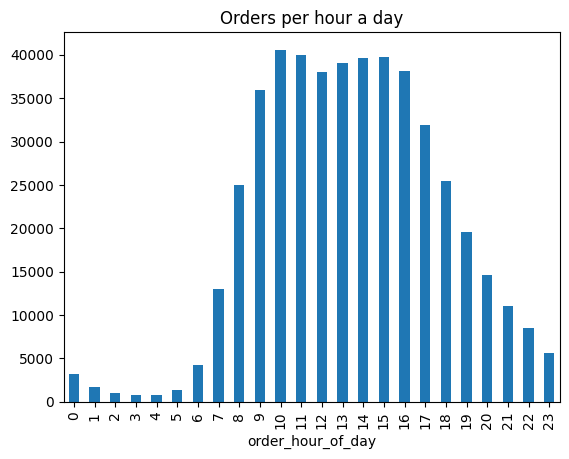

In [37]:
df_a2 = ins_orders.groupby('order_hour_of_day')['user_id'].count()
df_a2.plot(kind='bar', title= 'Orders per hour a day')

conclusiones
Con esta gráfica observamos que la gran mayoría de las órdenes que se realizan ocurren entre las 9 y las 16 horas, teniendo reducciones considerables en los extremos de las horas del gráfico, siendo la madrugada (de 0 a 5 horas) cuando menos actividad se registra. 

### [A3] ¿Qué día de la semana compran víveres las personas?

<AxesSubplot:title={'center':'Orders per day'}, xlabel='order_dow'>

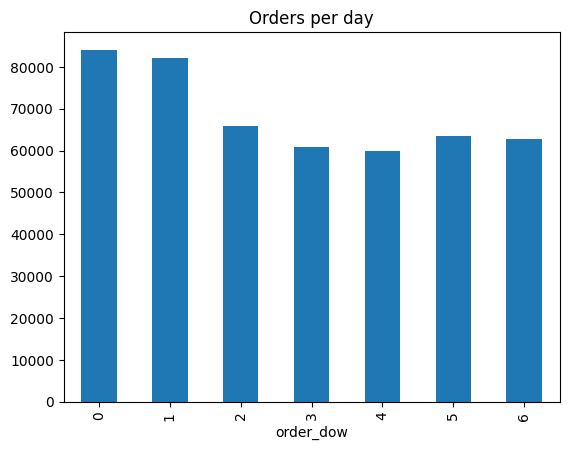

In [38]:
df_a3 = ins_orders.groupby('order_dow')['user_id'].count()
df_a3.plot(kind='bar', title= 'Orders per day')

conclusiones
Con las gráficas que observamos arriba se muestra que los días que tienen más tráfico de compras ocurre durante los días domingo y lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<AxesSubplot:title={'center':'Time until people reorder'}>

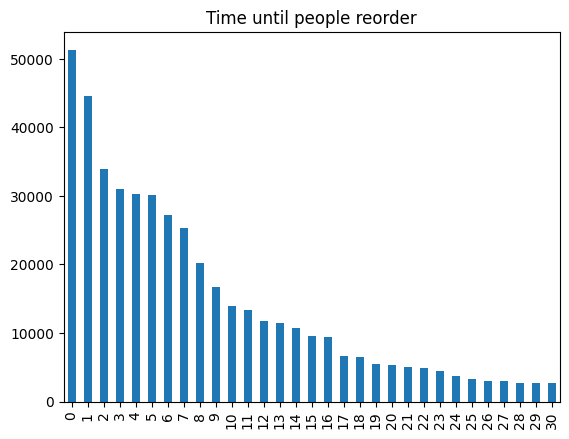

In [39]:
df_a4 = ins_orders['days_since_prior_order'].value_counts().reset_index(drop= True)
df_a4.plot(kind= 'bar', title= 'Time until people reorder')

#Listo, creo que las conclusiones fueron las mismas pero es bastante más gráfico el cambio entre todos los días que solo tener en mente que el máximo son 30 días y el mínimo 0.

conclusiones
- Para empezar, podemos decir que las órdenes se hacen a lo largo de toda la semana, siendo los jueves los días con menor número de compras y los domíngos los días en los que se tiene un mayor volumen de pedidos.
- Los clientes pueden volver a hacer una compra hasta pasados 30 días desde su último pedido, pero también llegan a hacer compras nuevamente en el mismo día.

# [B] Intermedio (deben completarse todos para aprobar)
1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
wednesday = ins_orders[ins_orders['order_dow'] == 3].groupby('order_hour_of_day')['user_id'].count()
#wednesday.plot(kind='bar', title= 'Wednesday orders', ylabel= 'Order counting')
saturday = ins_orders[ins_orders['order_dow'] == 6].groupby('order_hour_of_day')['user_id'].count()
#saturday.plot(kind='bar', title= 'Saturday orders', ylabel= 'Order counting')

<AxesSubplot:title={'center':'Wed vs Sat purchases'}, xlabel='order_hour_of_day'>

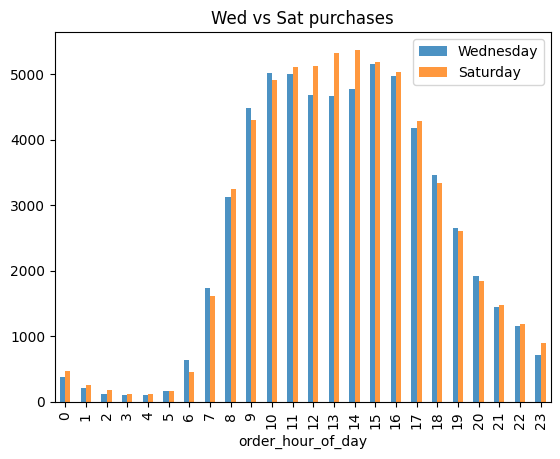

In [41]:
concat_info = pd.concat([wednesday, saturday], axis=1, keys=['Wednesday', 'Saturday'])
concat_info.plot(kind= 'bar', title= 'Wed vs Sat purchases', alpha = .8)

conclusiones
Sí existen diferencias entre las distribuciones de miércoles y sábado; no obstante, me parece que también tienen una similitud considerable en cuanto a los horarios con mayor número de pedidos, ya que ambos días comparten un rango de muchas compras entre las 9 y las 17 horas, que aunque el sábado mantiene un mayor número de órdenes, sí se puede observar que el miércoles no se queda tan atrás. Lo que demuestra que estos días la elaboración de órdenes se realiza durante el mismo periodo de tiempo.
No obstante, la disminución después de las 17 horas es similar en ambos días, pero los sábados parecen tener una caída un poco más lenta en la noche, lo que nos demuestra que aunque siguen patrones similares, hay mayor flujo de órdenes y durante un periodo más prolongado los días sábado. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [42]:
df_b2 = ins_orders.groupby('user_id')['order_id'].count()

<AxesSubplot:title={'center':'Distribución de pedidos por cliente'}, ylabel='Frequency'>

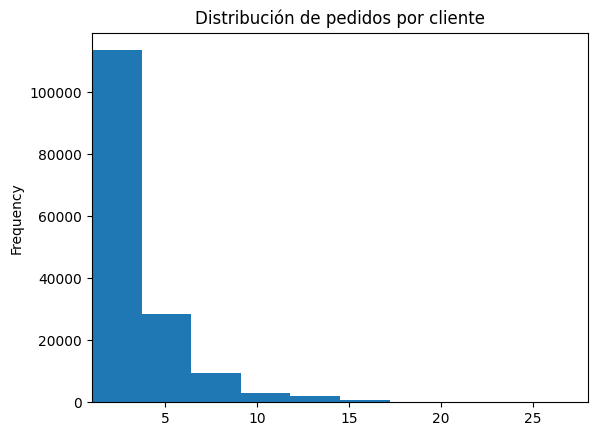

In [43]:
df_b2.plot(kind='hist', title='Distribución de pedidos por cliente', xlim=[1, 28])

conclusiones
Al revisar el máximo de pedidos que realizó solo uno de los clientes pude ver que era de 28 y el mínimo de 1, con la gráfica se muestra que en su mayoría, los clientes no suelen pasar de los 5 pedidos y que en su mayotía solo realizan 1, teniendo más de 100,000 personas con un único pedido en la plataforma. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [44]:
df_b3 = orders.merge(products, on= "product_id")
top = df_b3.groupby(['product_id', 'product_name'])['order_id'].count()
top_20 = top.sort_values(ascending=False).head(20)

<AxesSubplot:title={'center':'Top 20 products'}, xlabel='product_id,product_name'>

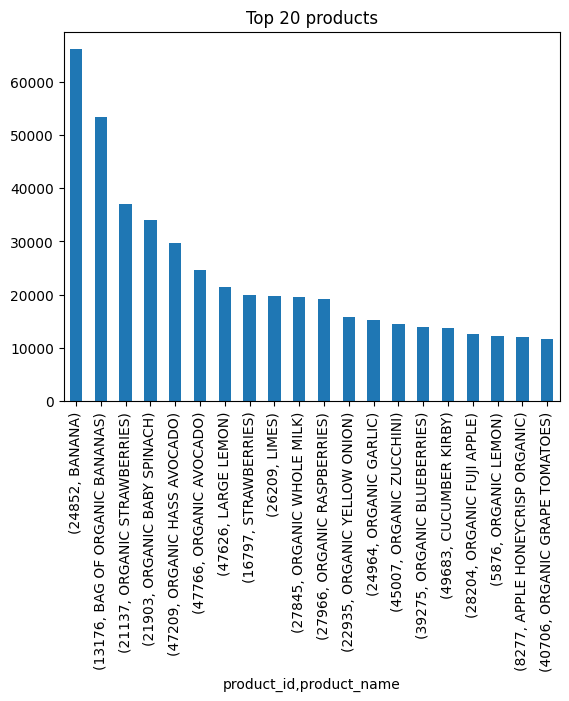

In [45]:
top_20.plot(kind="bar", title= 'Top 20 products')

conclusiones
Sorprendentemente, el producto que se vende con mayor frecuencia en las órdenes de los clientes son los plátanos, siendo sus dos presentaciones los artículos con el cúmulo de ventas más grande del DF. Además podemos notar que todos los productos dentro de este top 20 son frutas y verdutas, lo que es una grata sorpresa.
#Mil gracias por la explicación Ezequiel, creo que lo complicado era tener la lógica de lo que pedía el problema y no realmente la complejidad del código, con tu orientación fue bastante más sencillo lograr este paso. 

# [C] Difícil (deben completarse todos para aprobar)
1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [46]:
df_c1 = orders.groupby('order_id')['product_id'].count()

In [47]:
df_c1 = df_c1.value_counts().sort_index()

<AxesSubplot:title={'center':'Usual amount of purhased products by order'}>

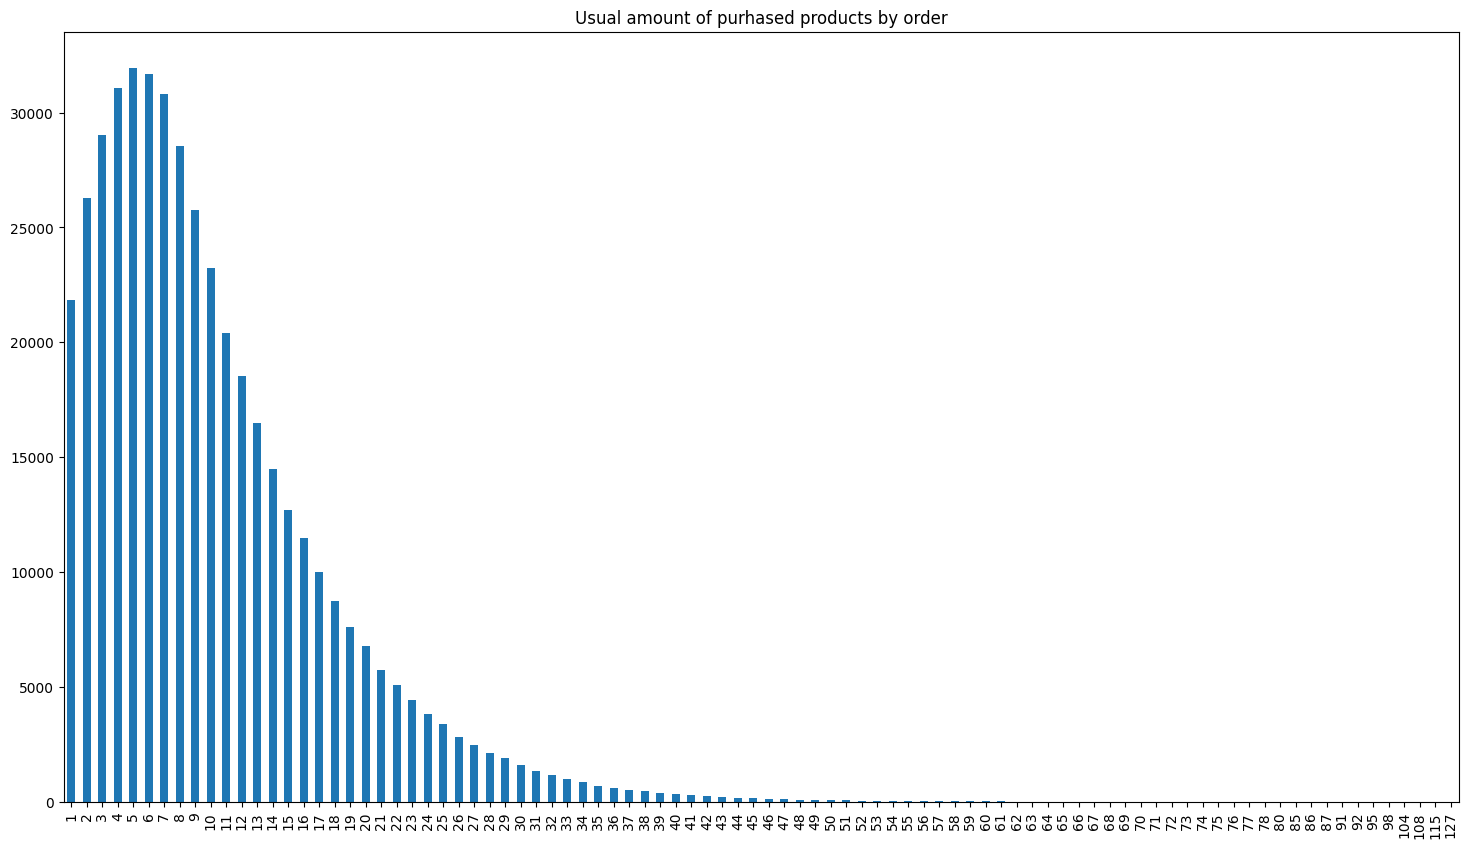

In [48]:
df_c1.plot(kind= 'bar', title= 'Usual amount of purhased products by order', figsize=[18,10])

conclusiones
En este gráfico se observa cómo es que hay una tendencia a aumentar el número de productos entre 1 y 5, posterior a ello vemos un descenso paulatino que mantiene una cantidad significativa de órdenes hasta los 20 artículos, pero de ahí en más vemos una caida más consistente y acelerada hasta llegar a compras no muy usuales que pueden llegar hasta los 127 productos. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [49]:
filtered_data = orders[orders['reordered'] == 1]

In [50]:
df_c2 = filtered_data.merge(products, on= 'product_id')

In [51]:
product_counts = df_c2.groupby(['product_id', 'product_name']).size()

In [52]:
top_products = product_counts.sort_values(ascending=False).head(20)

<AxesSubplot:title={'center':'Top 20 reordered items '}, xlabel='product_id,product_name'>

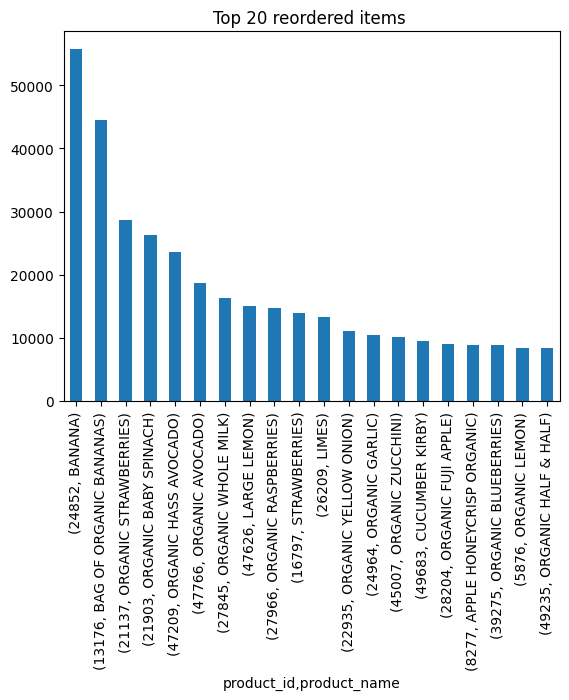

In [53]:
top_products.plot(kind= 'bar', title= 'Top 20 reordered items ')

conclusiones
En este caso la gráfica se parece mucho a la primera que salió de los 20 productos más comprados, hay algunas variaciones pero son muy similares. Aunque en esta vemos que los artículos se repiten más de 50 mil veces y en la gráfica anterior pasaba de los 60 mil. Diría que no hay cambios significativos entre los artículos más comprandos y los que más se reordenan, aunque eso dejaría claro que existe una relación entre que lo que más se pide también suele ser reordenado por los clientes.
#Traté de seguir las instrucciones aunque no sé si me desvié mucho, la sugerencia de usar size en lugar de count la tuve de una IA, no podía pasar del error que me daba y con ese cambio pude seguir con el código, si lo debo cambiar lo entiendo. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [54]:
merged_df = orders.merge(products, on="product_id")

In [55]:
reorder_rate = (merged_df.groupby(["product_id", "product_name"])["reordered"].mean().reset_index())

In [56]:
print(reorder_rate)

       product_id                                       product_name  \
0               1                         CHOCOLATE SANDWICH COOKIES   
1               2                                   ALL-SEASONS SALT   
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4               7                     PURE COCONUT WATER WITH ORANGE   
...           ...                                                ...   
44608       49690                      HIGH PERFORMANCE ENERGY DRINK   
44609       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
44610       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
44611       49693                             SPRING WATER BODY WASH   
44612       49694                            BURRITO- STEAK & CHEESE   

       reordered  
0       0.564286  
1       0.000000  
2       0.738095  
3       0.510204  
4       0.500000  
...          ...  
44

conclusiones
Los resultados muestran que la tasa de reordenación varía significativamente entre los productos analizados, con algunos poco reordenados y otros con tasas cercanas al 80%. Esto indica que ciertos productos son recurrentemente comprados por los usuarios, mientras que otros tienen una baja fidelidad de recompra, lo que puede ser de gran ayuda para priorizar el requerimiento de algunos productos que se suelen pedir constantemente y tal vez disminuir los que no son tan frecuentes. 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [57]:
merged_df = orders.merge(ins_orders[["order_id", "user_id"]], on="order_id")
user_reorder_rate = merged_df.groupby("user_id")["reordered"].mean().reset_index()
user_reorder_rate.rename(columns={"reordered": "reorder_ratio"}, inplace=True)
print(user_reorder_rate)

        user_id  reorder_ratio
0             2       0.038462
1             4       0.000000
2             5       0.666667
3             6       0.000000
4             7       0.928571
...         ...            ...
149621   206203       0.222222
149622   206206       0.714286
149623   206207       0.891304
149624   206208       0.696000
149625   206209       0.320000

[149626 rows x 2 columns]


conclusiones
El análisis revela que la frecuencia de reordenación varía entre usuarios, con algunos casi nunca repitiendo compras y otros que otros reordenan la mayoría de las veces. La métrica puede llegar a ser clave para identificar clientes leales y predecir su comportamiento de compra. Filtrar por usuarios con altas tasas de reordenación puede ayudar a diseñar estrategias de fidelización y recomendaciones personalizadas.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [58]:
merged_df = orders.merge(products, on="product_id")
first_in_cart = merged_df[merged_df["add_to_cart_order"] == 1]
first_count = first_in_cart.groupby(["product_id", "product_name"]).size().reset_index(name="first_added_count")
top_first_products = first_count.sort_values(by="first_added_count", ascending=False)
print(top_first_products)

       product_id                          product_name  first_added_count
13280       24852                                BANANA              15562
7051        13176                BAG OF ORGANIC BANANAS              11026
14881       27845                    ORGANIC WHOLE MILK               4363
11266       21137                  ORGANIC STRAWBERRIES               3946
25195       47209                  ORGANIC HASS AVOCADO               3390
...           ...                                   ...                ...
13836       25887                       DAFFODILS- 10\"                  1
13839       25892          GRAHAM CRACKER 9\" PIE CRUST                  1
13848       25906         PALEO GRANOLA CINNAMON CRUNCH                  1
13852       25917  \"MIES VANILLA ROHE\" ICE CREAM BARS                  1
14038       26253                    POTATO & LEEK SOUP                  1

[26501 rows x 3 columns]


conclusiones
El análisis revela que los productos más comúnmente agregados primero al carrito son alimentos básicos y frescos, siendo los plátnos quienes lideran la lista por un amplio margen. La presencia de productos como leche, fresas y aguacates podría significar que los consumidores priorizan artículos esenciales y saludables al comenzar sus compras.
Finalmente, este patrón puede ser útil para estrategias de comercialización, destacando estos productos en promociones o en la interfaz de compras para mejorar la experiencia del usuario y aumentar la conversión de ventas.

### Conclusion general del proyecto:

El análisis de los datos de Instacart reveló patrones clave en el comportamiento de compra de los usuarios. La limpieza y preprocesamiento fueron esenciales para asegurar resultados precisos. Se destacó la lealtad de los clientes a ciertos productos, con un porcentaje considerable de productos reordenados. También se identificaron los productos más añadidos al carrito, lo que puede ayudar en estrategias de recomendación para los usuarios.
Entre los hallazgos más significativos se encuentra la proporción de productos que los clientes reordenan en comparación con los pedidos nuevos. Se identificó que un porcentaje considerable de los productos en cada pedido ya habían sido adquiridos previamente, lo que resalta la importancia de la lealtad de los clientes a ciertos productos. Asimismo, se determinó cuáles son los productos más frecuentemente añadidos en primer lugar al carrito, lo que puede ayudar en estrategias de recomendación y diseño de la plataforma. Finalmente, el análisis gráfico facilitó la visualización y comunicación de los hallazgos ya que permitien visualizar estos patrones de manera clara y efectiva, facilitando la interpretación de los resultados. 

¡¡¡Listo Ezequiel!!! Creo que ahora sí quedó todo, muchísimas gracias por tu paciencia y comentarios, quedo atento por si hubo alguna otra situación o siguen habiendo áreas de mejora, de verdad gracias por el seguimiento, honestamente este proyecto me desmoralizó algo, pero con tu ayuda salió poco a poco. Mil gracias de nuevo